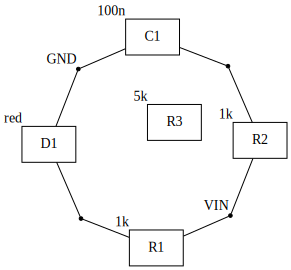

In [5]:
import skidl
from easy_skidl import *

default_circuit.mini_reset()

r1 = resistor('1k 0603')
r2, r3 = r1 * 2
r3.value = '5k'

c1 = capacitor('0.1uF 0805')

led1 = led('0805 red')

vin = skidl.Net('VIN')
gnd = skidl.Net('GND')

vin     += r1[1], r2[1]
r2[2]   += c1[1]
c1[2]   += gnd
led1['a'] += r1[2]
led1['k'] += gnd

skidl.generate_graph()

In [ ]:
#easy_skidl.py
import skidl
import electro_grammar
from quantiphy import Quantity

def component(description):
    c = electro_grammar.parse(description)
    if c['type'] == 'resistor':
        p = skidl.Part('device', 'R')
        p.value = Quantity(c['resistance'])
        if 'size' in c:
            p.footprint = 'Resistors_SMD:R_{}'.format(c['size'])
        return p
    elif c['type'] == 'capacitor':
        p = skidl.Part('device', 'C')
        p.value = Quantity(c['capacitance'])
        if 'size' in c:
            p.footprint = 'Capacitors_SMD:C_{}'.format(c['size'])
        return p
    elif c['type'] == 'led':
        p = skidl.Part('device', 'LED')
        p.value = c['color']
        if 'size' in c:
            p.footprint = 'LEDS:LED_{}'.format(c['size'])
        return p
    raise Exception('could not determine component type from "{}"'.format(description))

def resistor(description=''):
    return component(description)

def capacitor(description=''):
    return component(description)

def led(description=''):
    return component('led ' + description)